# 1. Loading all libraries 

In [104]:
import numpy as np
import pandas as pd
import json
import requests
import tweepy
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

# 2. Gathering all data

In [105]:
twitter_archive= pd.read_csv("C:\\Users\\pc\\Downloads\\twitter-archive-enhanced.csv")

url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    


In [106]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [107]:
#Using the Requests library to download the tweet image prediction (image_predictions.tsv)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')


In [108]:
#Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
#keys are hidden
consumer_key = "Hidden Key"
consumer_secret = "Hidden Key"
access_token = "Hidden Key"
access_secret ="Hidden Key" 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

tweet_ids_list = list(twitter_archive['tweet_id'])

del_tweet_ids = []
start_time = datetime.now()
with open('tweet_json.txt', 'a') as f:
    for tweet_id in tweet_ids_list:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump( tweet._json, f)
            f.write('\n')
            print(tweet_id)
        except:
            del_tweet_ids.append(tweet_id)
            print(tweet_id)
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

In [ ]:
del_tweet_ids

[888202515573088257,
 877611172832227328,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 858860390427611136,
 856602993587888130,
 856330835276025856,
 851953902622658560,
 851861385021730816,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 766864461642756096,
 759923798737051648,
 759566828574212096,
 757597904299253760,
 754011816964026368,
 680055455951884288]

In [ ]:
#putting the tweets that doesn't exit in a list to further use
del_tweet_ids = ['888202515573088257', '873697596434513921', '869988702071779329', '866816280283807744', '861769973181624320',
                 '845459076796616705', '842892208864923648', '837012587749474308', '827228250799742977', '802247111496568832',
                 '775096608509886464', '779123168116150273','771004394259247104','766864461642756096','759923798737051648',
                '759566828574212096','754011816964026368','680055455951884288','812747805718642688','829374341691346946',
                 '856602993587888130','872261713294495745','851953902622658560','851861385021730816','837366284874571778',
                '856330835276025856','877611172832227328','872668790621863937','844704788403113984']

In [ ]:
#Reading the text file created line by line into an empty list using the readline method 
#each tweet's json is read into string form
tweets_list = []
with open('tweet_json.txt') as f:
    for tweet_id in tweet_ids_list:
        if tweet_id not in del_tweet_ids:
            tweets_list.append(f.readline())
            
#removing some empty stringin the tweet list by using list comprehension
tweets_list_updated = [i for i in tweets_list if i != '']

#Creating a list of dictionaries with each tweet's id, retweet count and favourite count
#Since each tweet's json is in string form, I need to convert them first by using the json.loads method
count_list = []
for e in tweets_list_updated:
    tweet_id = json.loads(e)['id']
    retweet_count = json.loads(e)['retweet_count']
    favourite_count = json.loads(e)['favorite_count']
    count_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favourite_count': favourite_count})
tweet_counts = pd.DataFrame(count_list, columns = ['tweet_id', 'retweet_count', 'favourite_count'])
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2356 non-null   int64
 1   retweet_count    2356 non-null   int64
 2   favourite_count  2356 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [ ]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


# 3. Assessing Data

In [ ]:
#in this stage I will get more info on the data by diving more into the twitter archive dataframe
twitter_archive.head() 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


To get more info about cells with NaN

In [ ]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
#filtering out all the rows where retweeted_status_id is null
twitter_archive[- twitter_archive.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [ ]:
#filtering the dog names (None) from the row
twitter_archive[twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


On checking out the duplicated values in the name feature its evident that maybe a lot of the dogs didn't have a name or that data got lost and got replaced by the default 'None'. Also there are a lot of irrelevant values in that column like 'a', 'quite', 'the' which clearly shows that the wrong text was extracted from the text column. This issue should come under the accuracy dimension of quality issues.

Also, the url for the tweet with tweet id 885518971528720385 seems to be broken as the page cannot be found.

In [ ]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

From the list above we caan see that out the counts of all the names in the name column and we can clearly see that there are names like None, a,  which aren't the right names.

In [ ]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
652,792394556390137856,NaN,NaN,2016-10-29 15:55:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet BeBe. She rocks the messy bun of your dre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792394556...,12,10,BeBe,None,None,None,None
497,813142292504645637,NaN,NaN,2016-12-25 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813142292...,13,10,None,None,None,None,None
1890,674767892831932416,NaN,NaN,2015-12-10 01:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup was carefully tossed to make it look ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674767892...,12,10,None,None,None,None,None
1346,704480331685040129,NaN,NaN,2016-03-01 01:36:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucia. She's a Cumulonimbus Floofmallow. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704480331...,11,10,Lucia,None,None,None,None
283,838952994649550848,NaN,NaN,2017-03-07 03:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,NaN,NaN,NaN,https://twitter.com/ktla/status/83894871422799...,13,10,None,None,None,None,None


Observing a random sample above shows that Nan value in the expanded urls column. There are Nan values in the columns doggo, floofer, pupper and puppo as well but they are represented by 'None', that's why they didn't show up in the info table I generated earlier.

In [ ]:
#getting the counts for all the ratings in the rating_numerator column
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

From above it shows lot of the ratings which don't look like they are correct. Most of the ratings given by the twitter handle are 12, 11, 10, 13 and so on whereas only a couple of dogs or even less have been given a rating of 80, 420, 165, 960 and more of that order. These ratings seem to be accuracy errors.



In [ ]:
#the actual rating below should be 9.75 instead of 75
twitter_archive[twitter_archive.rating_numerator == 75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


Looking up the text for the tweets corresponding to these ratings, I found out that there were decimals in some of these ratings and the number before the decimal point has been wrongfully scraped off in some cases. Thus this also points out to the fact that ratings numerator should be of data type float.

In [ ]:
#getting the counts for all the ratings in the rating_denominator column
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

Again this shows that there can be inaccurate values in this column as well since the total rating is 10.

In [ ]:
#filtering out all the rows where the name is None
twitter_archive[twitter_archive.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


From the info above after visually assessing the text column here in an Excel sheet, its seen that some tweets are invalid as people send pictures of other animals or things to rate as well.

In [ ]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

From above since the source column consist of url, is a bit untidy with all the non-alphanumeric characters and thus a little difficult to read.



Getting more info on image prediction

In [ ]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


On visually assessing the table above, some of the predictions in the p1 column aren't breeds of dogs but other animals or non-living things and on checking out the corresponding image urls on a browser myself, a lot of these images didn't have any dogs in them. Thus such tweets are invalid.



In [ ]:
#to check for details about the image predictions
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
image_prediction.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [ ]:
image_prediction.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1395,767754930266464257,https://pbs.twimg.com/media/CqedCQWWgAIab9L.jpg,1,vizsla,0.307794,True,fountain,0.142185,False,Chesapeake_Bay_retriever,0.113903,True
520,676533798876651520,https://pbs.twimg.com/media/CWOH4s9U8AEtkmQ.jpg,1,chow,0.265274,True,ice_bear,0.167614,False,fur_coat,0.117506,False
1998,875144289856114688,https://pbs.twimg.com/ext_tw_video_thumb/87514...,1,Siberian_husky,0.245048,True,Pembroke,0.223716,True,dingo,0.160753,False
1988,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,3,pug,0.999120,True,French_bulldog,0.000552,True,bull_mastiff,0.000073,True


The prediction columns shows some underscores visible that make the data look a little untidy and underprepared.

In [ ]:
#getting the counts of all the prediction values in the p1 column
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

Its noted that the top predictions for a lot of the tweets have been other animals or things, evident from the list above.

In [ ]:
#filtering out all the rows where the value of p1 is 'web_site'
image_prediction[image_prediction.p1 == 'web_site']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False


A lot of the images here are not necessarily dog pictures but snapshots or private chats as well. Also, there are some retweets which are necessary not valid, the first two tweets are reweets.

In [ ]:
twitter_archive[twitter_archive.tweet_id == 667550882905632768] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None


In [ ]:
#checking for tweet counts 
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2356 non-null   int64
 1   retweet_count    2356 non-null   int64
 2   favourite_count  2356 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [ ]:
#summarizing the columns in the table
tweet_counts.describe()

,tweet_id,retweet_count,favourite_count
count,2.356000e+03,2356.000000,2356.000000
mean,7.850227e+17,3546.154924,10512.451188
std,6.634009e+16,4852.894419,13117.208465
min,6.722453e+17,1.000000,0.000000
25%,7.371671e+17,1034.750000,2071.250000
50%,7.973909e+17,2186.000000,6851.500000
75%,8.352979e+17,4150.250000,14679.750000
max,8.924206e+17,70097.000000,143760.000000


In [ ]:
tweet_counts.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,6952,33603
1,892177421306343426,5254,29146
2,891815181378084864,3461,21936
3,891689557279858688,7163,36670
4,891327558926688256,7700,35062


### Quality issues
1. Retweets in many rows.

2. Incorrect data types for tweet_id, timestamp and rating_numerator.

3. Inaccurate dog names in the name column and NaN values represented by the word 'None'.

4. The source column is a bit untidy cause of the urls and thus a little difficult to interpret.

5. The tweet with the dog name Phineas has been duplicated.

6. Inaccurate values in the rating_numerator and rating_denominator columns.

7. Missing records in the expanded_urls column (2297 out of 2356)

8. Underscores in place of spaces in the p1, p2, p3 prediction columns

9. Incorrect data type for tweet id.

### Tidiness issues
1. Joining this table and the twitter archives table.

2. Doggo, floofer, pupper, puppo should be column values but are instead column headers.

3. Two values in the timestamp column: date and time.

# Cleaning Data

In [ ]:
#making copies of the three tables to conduct cleaning operations on
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_counts_clean = tweet_counts.copy()

##### Twitter Archive Table


In [ ]:
#Removing all reweets  by removing all the rows with non null values in retweeted_status_id.
#subsetting the table over all the rows having null values in the retweeted_status_id column
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

Test

In [ ]:
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [ ]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

Dropping the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.



In [ ]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp'], axis = 1)

Testing

In [ ]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


Creating a new column named dog_type with doggo, floofer, pupper, puppo as its values; extracted from the text column and drop the doggo, floofer, pupper, puppo columns. Also, change the datatype of the new column created to category.

In [ ]:
#creating the column dog_type
twitter_archive_clean['dog_type'] = twitter_archive_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

#some whitespaces also got extracted to the dog_type column, thus removing them
twitter_archive_clean.dog_type = twitter_archive_clean.dog_type.str.strip()

In [ ]:
#dropping the columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)
#changing the datatype of dog_type to category
twitter_archive_clean.dog_type = twitter_archive_clean.dog_type.astype('category')

Testing 

In [ ]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN


In [ ]:
#Getting info on the cleaned twitter archive 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   int64   
 1   timestamp           2175 non-null   object  
 2   source              2175 non-null   object  
 3   text                2175 non-null   object  
 4   expanded_urls       2117 non-null   object  
 5   rating_numerator    2175 non-null   int64   
 6   rating_denominator  2175 non-null   int64   
 7   name                2175 non-null   object  
 8   dog_type            240 non-null    category
dtypes: category(1), int64(3), object(5)
memory usage: 155.3+ KB


Image Prediction Cleaning: 

Doing an inner join on the twitter archive table and the image_prediction table since we only want tweets with images and no retweets. Also, drop the unnecessary columns after that, this will also remove all the rows with null values in the expanded_urls column since those are the tweets with no images and thus aren't there in the image prediction table.

In [ ]:
twitter_archive_clean = twitter_archive_clean.merge(image_prediction_clean, on = 'tweet_id', how = 'inner')
#dropping the unnecessary columns
twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

Testing 

In [ ]:
twitter_archive_clean.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False


Next step on the cleaning: 

Join the tweet_counts table to the twitter archive table to get the favourite and retweet counts.

In [ ]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_counts_clean, on = 'tweet_id', how = 'left')

Testing 

In [ ]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2514 non-null   int64   
 1   timestamp           2514 non-null   object  
 2   source              2514 non-null   object  
 3   text                2514 non-null   object  
 4   expanded_urls       2514 non-null   object  
 5   rating_numerator    2514 non-null   int64   
 6   rating_denominator  2514 non-null   int64   
 7   name                2514 non-null   object  
 8   dog_type            277 non-null    category
 9   jpg_url             2514 non-null   object  
 10  p1                  2514 non-null   object  
 11  p1_conf             2514 non-null   float64 
 12  p1_dog              2514 non-null   bool    
 13  retweet_count       1880 non-null   float64 
 14  favourite_count     1880 non-null   float64 
dtypes: bool(1), category(1), float64(3), i

In [ ]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favourite_count
2493,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,NaN,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,Maltese_dog,0.857531,True,NaN,NaN
2315,669680153564442624,2015-11-26 00:52:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shawwn. He's a Turkish Gangrene Robitu...,https://twitter.com/dog_rates/status/669680153...,8,10,Shawwn,NaN,https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg,dalmatian,0.141257,True,NaN,NaN
1502,709556954897764353,2016-03-15 01:48:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cecil. She's a Gigglefloof Poofer. Out...,https://twitter.com/dog_rates/status/709556954...,12,10,Cecil,NaN,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,golden_retriever,0.790026,True,NaN,NaN


Next step on the cleaning: 

Changing the datatypes of the tweet_id, timestamp columns to string and datetime respectively.
Changing the datatype of the rating_numerator and rating_denominator columns to float.

In [ ]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp, yearfirst = True)
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_numerator.astype(float)

Testing

In [ ]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2514 non-null   object             
 1   timestamp           2514 non-null   datetime64[ns, UTC]
 2   source              2514 non-null   object             
 3   text                2514 non-null   object             
 4   expanded_urls       2514 non-null   object             
 5   rating_numerator    2514 non-null   float64            
 6   rating_denominator  2514 non-null   float64            
 7   name                2514 non-null   object             
 8   dog_type            277 non-null    category           
 9   jpg_url             2514 non-null   object             
 10  p1                  2514 non-null   object             
 11  p1_conf             2514 non-null   float64            
 12  p1_dog              2514 non-null 

Next step in the cleaning: 

Extracting the date and time from the timestamp column and putting them into two new columns. Drop the timestamp column after that.



In [ ]:
#using the apply function, applying the strftime function to each value of the timestamp column in each row
twitter_archive_clean['date'] = twitter_archive_clean['timestamp'].apply(lambda x: x.strftime('%d-%m-%Y'))
twitter_archive_clean['time'] = twitter_archive_clean['timestamp'].apply(lambda x: x.strftime('%H:%M:%S'))

#changing datatype of the date column to datetime
twitter_archive_clean.date = pd.to_datetime(twitter_archive_clean.date, dayfirst = True)

In [ ]:
#dropping the timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis = 1)

Testing 

In [ ]:
twitter_archive_clean.head(4)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favourite_count,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,13.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,6952.0,33603.0,2017-08-01,16:23:56
1,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,13.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,6952.0,33607.0,2017-08-01,16:23:56
2,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,5254.0,29146.0,2017-08-01,00:17:27
3,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,5254.0,29146.0,2017-08-01,00:17:27


Making the source column readable by replacing the urls in it by the source name and change its datatype to category.

In [ ]:
#the source column has only 3 different values, thus assigning each value to a different variable  
a = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
b = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
c = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [ ]:
#using the variables created above in the replace function 
twitter_archive_clean.source = twitter_archive_clean.source.replace(a, 'Twitter for iPhone')
twitter_archive_clean.source = twitter_archive_clean.source.replace(b, 'Twitter Web Client')
twitter_archive_clean.source = twitter_archive_clean.source.replace(c, 'TweetDeck')

Testing 

In [ ]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    2472
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

Rename some of the columns in the table and re-arrange them.
Convert the proportions in the p1 confidence column into percentages.
Replace the underscores in the p1 column by spaces.
Capitalize the first letter of every word in the p1 column.

In [ ]:
#renaming some of the columns
twitter_archive_clean = twitter_archive_clean.rename({'jpg_url': 'image_url', 'p1':'prediction',
                                                        'p1_conf': 'confidence_percentage', 'p1_dog': 'breed_predicted'},
                                                       axis = 'columns')
#re-arranging all the columns for better viewing
twitter_archive_clean = twitter_archive_clean[['tweet_id', 'source', 'image_url', 'date', 'time', 'favourite_count',
                                                 'retweet_count', 'text', 'name', 'dog_type', 'rating_numerator',
                                                 'rating_denominator', 'prediction', 'confidence_percentage', 
                                                 'breed_predicted', 'expanded_urls']]
#changing the values in confidence level from proportions to percentages
twitter_archive_clean.confidence_percentage = twitter_archive_clean.confidence_percentage.apply(lambda x: round(x*100, 2))
#replacing the underscores in the prediction column by spaces
twitter_archive_clean.prediction = twitter_archive_clean.prediction.str.replace('_', ' ')
#changing the first letter of every word in the prediction column to uppercase
twitter_archive_clean.prediction = twitter_archive_clean.prediction.str.title()

Testing 

In [ ]:
twitter_archive_clean.head(3)

,tweet_id,source,image_url,date,time,favourite_count,retweet_count,text,name,dog_type,rating_numerator,rating_denominator,prediction,confidence_percentage,breed_predicted,expanded_urls
0,892420643555336193,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01,16:23:56,33603.0,6952.0,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,13.0,Orange,9.70,False,https://twitter.com/dog_rates/status/892420643...
1,892420643555336193,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01,16:23:56,33607.0,6952.0,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,13.0,Orange,9.70,False,https://twitter.com/dog_rates/status/892420643...
2,892177421306343426,Twitter for iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,2017-08-01,00:17:27,29146.0,5254.0,This is Tilly. She's just checking pup on you....,Tilly,NaN,13.0,13.0,Chihuahua,32.36,True,https://twitter.com/dog_rates/status/892177421...


Next step on the cleaning:
 
Replace the incorrect dog names i.e. the names in lowercases with the correct ones by extracting them from their corresponding text. Also replace the remaining 'None' in the name column by NaN values.

In [ ]:
#filtering out rows where there is the word 'named' in the text and the name is in lowercase - these are probably the rows where 
#the names are incorrect and then creating a list out of their corresponding indices
index_list = twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('named') & 
                                              twitter_archive_clean.name.str.islower()].index.tolist()
all_indices = twitter_archive_clean.index.tolist()
for e in all_indices:
    if e in index_list:
        for ele in list(range(len(index_list))):
            #creating a list out of all such text values that contain the word 'named' and the corresponding name value 
            #is in lowercase            
            text_list = (twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('named') & 
                                                 twitter_archive_clean.name.str.islower()].text).tolist()
            #finding the index position in every text value in the list where 'named' occurs
            num = text_list[ele].find('named')
            #using this index position to extract a particular pattern of dog name out of the text and then assign it to the
            #corresponding name value
            x = twitter_archive_clean.loc[twitter_archive_clean.index == e, 'text'].str[num+6:].str.extract(r'([A-Z][a-z]+)',
                                                                                                          expand = True)[0]
            twitter_archive_clean.loc[twitter_archive_clean.index == e, 'name'] = x
            break

In [ ]:
#this is the same code as above, only tinkering it a bit to filter out rows with 'named' in the text and 'None' in the 
#name column
index_list = twitter_archive_clean.loc[(twitter_archive_clean.name == 'None') & 
                                        (twitter_archive_clean.text.str.contains('named'))].index.tolist()
for e in all_indices:
    if e in index_list:
        for ele in list(range(len(index_list))):
            text_list = (twitter_archive_clean.loc[(twitter_archive_clean.name == 'None') & 
                                                 (twitter_archive_clean.text.str.contains('named'))].text).tolist()
            num = text_list[ele].find('named')
            x = twitter_archive_clean.loc[twitter_archive_clean.index == e, 'text'].str[num+6:].str.extract(r'([A-Z][a-z]+)',
                                                                                                          expand = True)[0]
            twitter_archive_clean.loc[twitter_archive_clean.index == e, 'name'] = x
            break

In [ ]:
#replacing the remaining 'None's in the name column by NaN values
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.nan)

Testing 

In [ ]:
twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('named')]

,tweet_id,source,image_url,date,time,favourite_count,retweet_count,text,name,dog_type,rating_numerator,rating_denominator,prediction,confidence_percentage,breed_predicted,expanded_urls
2023,675706639471788032,Twitter for iPhone,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,2015-12-12,15:59:51,580.0,84.0,This is a Sizzlin Menorah spaniel from Brookly...,Wylie,NaN,10.0,10.0,English Springer,99.03,True,https://twitter.com/dog_rates/status/675706639...
2120,673636718965334016,Twitter for iPhone,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,2015-12-06,22:54:44,990.0,307.0,This is a Lofted Aphrodisiac Terrier named Kip...,Kip,NaN,10.0,10.0,Wombat,88.03,False,https://twitter.com/dog_rates/status/673636718...
2199,671743150407421952,Twitter for iPhone,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,2015-12-01,17:30:22,NaN,NaN,This is a Tuscaloosa Alcatraz named Jacob (Yac...,Jacob,NaN,11.0,11.0,Toy Poodle,41.94,True,https://twitter.com/dog_rates/status/671743150...
2230,671147085991960577,Twitter for iPhone,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,2015-11-30,02:01:49,NaN,NaN,This is a Helvetica Listerine named Rufus. Thi...,Rufus,NaN,9.0,9.0,Yorkshire Terrier,46.72,True,https://twitter.com/dog_rates/status/671147085...
2280,670427002554466305,Twitter for iPhone,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,2015-11-28,02:20:27,NaN,NaN,This is a Deciduous Trimester mix named Spork....,Spork,NaN,9.0,9.0,Seat Belt,95.23,False,https://twitter.com/dog_rates/status/670427002...
2289,670361874861563904,Twitter for iPhone,https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg,2015-11-27,22:01:40,NaN,NaN,This is a Rich Mahogany Seltzer named Cherokee...,Cherokee,NaN,9.0,9.0,Platypus,97.41,False,https://twitter.com/dog_rates/status/670361874...
2292,670303360680108032,Twitter for iPhone,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,2015-11-27,18:09:09,NaN,NaN,This is a Speckled Cauliflower Yosemite named ...,Hemry,NaN,9.0,9.0,Shetland Sheepdog,38.03,True,https://twitter.com/dog_rates/status/670303360...
2310,669923323644657664,Twitter for iPhone,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,2015-11-26,16:59:01,NaN,NaN,This is a spotted Lipitor Rumpelstiltskin name...,Alphred,NaN,10.0,10.0,Car Mirror,34.31,False,https://twitter.com/dog_rates/status/669923323...
2324,669564461267722241,Twitter for iPhone,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,2015-11-25,17:13:02,NaN,NaN,This is a Coriander Baton Rouge named Alfredo....,Alfredo,NaN,10.0,10.0,Toy Poodle,62.37,True,https://twitter.com/dog_rates/status/669564461...
2329,669363888236994561,Twitter for iPhone,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,2015-11-25,03:56:01,NaN,NaN,Here we have a Gingivitis Pumpernickel named Z...,Zeus,NaN,10.0,10.0,Golden Retriever,53.90,True,https://twitter.com/dog_rates/status/669363888...


Next step on the cleaning:

Replace the inaccurate values in the rating_numerator column, where the numbers before the decimal were scraped off, with the correct values in the corresponding text column.

In [ ]:
#from all text values containing floating point numbers followed by a forward slash (/), extracting those numbers 
values = twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('(\d+\.\d+\/)'), 'text'].str.extract('(\d+\.\d+)')
#at rows which contains the aforementioned pattern in the the text values, assigning the numbers extracted above to the
#rating_numerator column
twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('(\d+\.\d+\/)'), 'rating_numerator'] = values
#on visually assessing I found out that the ratings at index 925 were incorrect, rating_numerator and rating_denominator 
#should be 11 and 10 respectively instead of 50
twitter_archive_clean.loc[twitter_archive_clean.index == 925, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.index == 925, 'rating_denominator'] = 10

C:\Users\pc\AppData\Local\Temp\ipykernel_18408\936695963.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  values = twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('(\d+\.\d+\/)'), 'text'].str.extract('(\d+\.\d+)')
C:\Users\pc\AppData\Local\Temp\ipykernel_18408\936695963.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('(\d+\.\d+\/)'), 'rating_numerator'] = values


Testing 

In [ ]:
#filtering out the rows which contain text values with floating point numbers as ratings
twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('(\d+\.\d+\/)')]

C:\Users\pc\AppData\Local\Temp\ipykernel_18408\1723425786.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('(\d+\.\d+\/)')]


,tweet_id,source,image_url,date,time,favourite_count,retweet_count,text,name,dog_type,rating_numerator,rating_denominator,prediction,confidence_percentage,breed_predicted,expanded_urls
78,883482846933004288,Twitter for iPhone,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,2017-07-08,00:28:19,39938.0,8198.0,This is Bella. She hopes her smile made you sm...,Bella,NaN,NaN,5.0,Golden Retriever,94.31,True,https://twitter.com/dog_rates/status/883482846...
79,883482846933004288,Twitter for iPhone,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,2017-07-08,00:28:19,39930.0,8198.0,This is Bella. She hopes her smile made you sm...,Bella,NaN,NaN,5.0,Golden Retriever,94.31,True,https://twitter.com/dog_rates/status/883482846...
1002,786709082849828864,Twitter for iPhone,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,2016-10-13,23:23:56,17279.0,5687.0,"This is Logan, the Chow who lived. He solemnly...",Logan,NaN,NaN,75.0,Pomeranian,46.73,True,https://twitter.com/dog_rates/status/786709082...
1003,786709082849828864,Twitter for iPhone,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,2016-10-13,23:23:56,17278.0,5686.0,"This is Logan, the Chow who lived. He solemnly...",Logan,NaN,NaN,75.0,Pomeranian,46.73,True,https://twitter.com/dog_rates/status/786709082...
1073,778027034220126208,Twitter for iPhone,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,2016-09-20,00:24:34,6161.0,1484.0,This is Sophie. She's a Jubilant Bush Pupper. ...,Sophie,NaN,NaN,27.0,Clumber,94.67,True,https://twitter.com/dog_rates/status/778027034...
1894,680494726643068929,Twitter for iPhone,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,2015-12-25,21:06:00,1566.0,435.0,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,26.0,Kuvasz,43.86,True,https://twitter.com/dog_rates/status/680494726...


In [ ]:
twitter_archive_clean[twitter_archive_clean.index == 925]

,tweet_id,source,image_url,date,time,favourite_count,retweet_count,text,name,dog_type,rating_numerator,rating_denominator,prediction,confidence_percentage,breed_predicted,expanded_urls
925,793226087023144960,Twitter for iPhone,https://pbs.twimg.com/media/CwIa5CjW8AErZgL.jpg,2016-10-31,23:00:11,9227.0,2694.0,"This is Juno. She spooked me up real good, but...",Juno,NaN,11.0,10.0,Wire-Haired Fox Terrier,45.6,True,https://twitter.com/dog_rates/status/793226087...


In [ ]:
#removing the duplicate name "Phineas"
twitter_archive_clean[twitter_archive_clean.name == 'Phineas']

,tweet_id,source,image_url,date,time,favourite_count,retweet_count,text,name,dog_type,rating_numerator,rating_denominator,prediction,confidence_percentage,breed_predicted,expanded_urls
0,892420643555336193,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01,16:23:56,33603.0,6952.0,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,13.0,Orange,9.70,False,https://twitter.com/dog_rates/status/892420643...
1,892420643555336193,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01,16:23:56,33607.0,6952.0,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,13.0,Orange,9.70,False,https://twitter.com/dog_rates/status/892420643...
2268,670668383499735048,Twitter for iPhone,https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg,2015-11-28,18:19:37,NaN,NaN,This is Phineas. He's a magical dog. Only appe...,Phineas,NaN,10.0,10.0,Banana,10.73,False,https://twitter.com/dog_rates/status/670668383...


In [ ]:
#removing the more recent tweet at index:0
twitter_archive_clean = twitter_archive_clean.drop(0, axis = 0)
#checking if the row was removed
twitter_archive_clean[twitter_archive_clean.name == 'Phineas']

,tweet_id,source,image_url,date,time,favourite_count,retweet_count,text,name,dog_type,rating_numerator,rating_denominator,prediction,confidence_percentage,breed_predicted,expanded_urls
1,892420643555336193,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01,16:23:56,33607.0,6952.0,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,13.0,Orange,9.70,False,https://twitter.com/dog_rates/status/892420643...
2268,670668383499735048,Twitter for iPhone,https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg,2015-11-28,18:19:37,NaN,NaN,This is Phineas. He's a magical dog. Only appe...,Phineas,NaN,10.0,10.0,Banana,10.73,False,https://twitter.com/dog_rates/status/670668383...


In [ ]:
#Changing tweet_id column's datatype from int to object
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)

Testing 

In [ ]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


Next step in cleaning:

Replace the underscores in the p1, p2 and p3 columns by spaces.


In [ ]:
#replacing using the replace function
image_prediction_clean.p1 = image_prediction_clean.p1.str.replace('_',' ')
image_prediction_clean.p2 = image_prediction_clean.p2.str.replace('_',' ')
image_prediction_clean.p3 = image_prediction_clean.p3.str.replace('_',' ')

Testing

In [ ]:
image_prediction_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English springer,German short-haired pointer
2071,paper towel,Labrador retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


In [ ]:
#Convert the proportions in the p1_conf, p2_conf and p3_conf columns into percentages.
#using apply, multiplying 100 to each column value in each row
image_prediction_clean.p1_conf = image_prediction_clean.p1_conf.apply(lambda x: round(x*100, 2))
image_prediction_clean.p2_conf = image_prediction_clean.p2_conf.apply(lambda x: round(x*100, 2))
image_prediction_clean.p3_conf = image_prediction_clean.p3_conf.apply(lambda x: round(x*100, 2))

Testing

In [ ]:
image_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,46.51,True,collie,15.67,True,Shetland sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.68,True,miniature pinscher,7.42,True,Rhodesian ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,59.65,True,malinois,13.86,True,bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,40.81,True,redbone,36.07,True,miniature pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,55.57,True,English springer,22.58,True,German short-haired pointer,17.52,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,17.03,False,Labrador retriever,16.81,True,spatula,4.08,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.60,True,malamute,7.83,True,kelpie,3.14,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.36,True,Pekinese,9.06,True,papillon,6.90,True


In [ ]:
#capitalizing by using the str.title function
image_prediction_clean.p1 = image_prediction_clean.p1.str.title()
image_prediction_clean.p2 = image_prediction_clean.p2.str.title()
image_prediction_clean.p3 = image_prediction_clean.p3.str.title()

Testing 

In [ ]:
image_prediction_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,46.51,True,Collie,15.67,True,Shetland Sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,50.68,True,Miniature Pinscher,7.42,True,Rhodesian Ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,59.65,True,Malinois,13.86,True,Bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,40.81,True,Redbone,36.07,True,Miniature Pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,65.11,True,English Springer,26.38,True,Greater Swiss Mountain Dog,1.62,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,93.30,False,Mud Turtle,4.59,False,Terrapin,1.79,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,69.25,True,Tibetan Mastiff,5.83,True,Fur Coat,5.44,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,96.25,False,Shopping Basket,1.46,False,Golden Retriever,0.80,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,20.15,True,Komondor,19.23,True,Soft-Coated Wheaten Terrier,8.21,True


In [ ]:
#Changing the column names of jpg_url, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog for better viewing.
image_prediction_clean = image_prediction_clean.rename({'jpg_url': 'image_url', 'p1': 'prediction_1',
                                                          'p1_conf': 'confidence_percent_1', 'p1_dog': 'breed_predicted_1',
                                                          'p2': 'prediction_2', 'p2_conf': 'confidence_percent_2',
                                                          'p2_dog': 'breed_predicted_2', 'p3': 'prediction_3',
                                                          'p3_conf': 'confidence_percent_3', 'p3_dog': 'breed_predicted_3'},
                                                         axis = 'columns')

Testing 

In [ ]:
image_prediction_clean.head()

,tweet_id,image_url,img_num,prediction_1,confidence_percent_1,breed_predicted_1,prediction_2,confidence_percent_2,breed_predicted_2,prediction_3,confidence_percent_3,breed_predicted_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,46.51,True,Collie,15.67,True,Shetland Sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,50.68,True,Miniature Pinscher,7.42,True,Rhodesian Ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,59.65,True,Malinois,13.86,True,Bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,40.81,True,Redbone,36.07,True,Miniature Pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True


In [ ]:
#Changing tweet_id column's datatype from int to object.

tweet_counts_clean.tweet_id = tweet_counts_clean.tweet_id.astype(str)

Testing

In [ ]:
tweet_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2356 non-null   object
 1   retweet_count    2356 non-null   int64 
 2   favourite_count  2356 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


# 5. Storing

Storing the final cleaned datasets to csv files.

In [ ]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)
image_prediction_clean.to_csv('image_predicitons_clean.csv', index = False)
tweet_counts_clean.to_csv('tweet_counts_clean.csv', index = False)

Analysis and Visualization

In [ ]:
#reading the cleaned twitter archives csv file for analysis
twitter_data = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')

In [ ]:
twitter_data

,tweet_id,source,image_url,date,time,favourite_count,retweet_count,text,name,dog_type,rating_numerator,rating_denominator,prediction,confidence_percentage,breed_predicted,expanded_urls
0,892420643555336193,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01,16:23:56,33607.0,6952.0,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,13.0,Orange,9.70,False,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,Twitter for iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,2017-08-01,00:17:27,29146.0,5254.0,This is Tilly. She's just checking pup on you....,Tilly,NaN,13.0,13.0,Chihuahua,32.36,True,https://twitter.com/dog_rates/status/892177421...
2,892177421306343426,Twitter for iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,2017-08-01,00:17:27,29146.0,5254.0,This is Tilly. She's just checking pup on you....,Tilly,NaN,13.0,13.0,Chihuahua,32.36,True,https://twitter.com/dog_rates/status/892177421...
3,891815181378084864,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,2017-07-31,00:18:03,21936.0,3461.0,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,12.0,12.0,Chihuahua,71.60,True,https://twitter.com/dog_rates/status/891815181...
4,891815181378084864,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,2017-07-31,00:18:03,21935.0,3461.0,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,12.0,12.0,Chihuahua,71.60,True,https://twitter.com/dog_rates/status/891815181...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,666049248165822465,Twitter for iPhone,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,2015-11-16,00:24:50,NaN,NaN,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,5.0,5.0,Miniature Pinscher,56.03,True,https://twitter.com/dog_rates/status/666049248...
2509,666044226329800704,Twitter for iPhone,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,2015-11-16,00:04:52,NaN,NaN,This is a purebred Piers Morgan. Loves to Netf...,a,NaN,6.0,6.0,Rhodesian Ridgeback,40.81,True,https://twitter.com/dog_rates/status/666044226...
2510,666033412701032449,Twitter for iPhone,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,2015-11-15,23:21:54,NaN,NaN,Here is a very happy pup. Big fan of well-main...,a,NaN,9.0,9.0,German Shepherd,59.65,True,https://twitter.com/dog_rates/status/666033412...
2511,666029285002620928,Twitter for iPhone,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,2015-11-15,23:05:30,NaN,NaN,This is a western brown Mitsubishi terrier. Up...,a,NaN,7.0,7.0,Redbone,50.68,True,https://twitter.com/dog_rates/status/666029285...


In [ ]:
#Dividing the dataset into two for the analysis
only_breeds = twitter_data[twitter_data.breed_predicted == True]
no_breeds = twitter_data[twitter_data.breed_predicted == False]

In [ ]:
only_breeds.prediction.value_counts().head(10)

Golden Retriever      193
Labrador Retriever    122
Pembroke              119
Chihuahua              97
Pug                    61
Chow                   54
Samoyed                53
Pomeranian             45
French Bulldog         40
Malamute               40
Name: prediction, dtype: int64

These are the top 10 most common dog breeds predicted out of all the dog pictures that were sent in.

In [ ]:
only_breeds.groupby('prediction')['favourite_count'].mean().sort_values(ascending = False).head(10)

prediction
Standard Poodle            35007.200000
Black-And-Tan Coonhound    29057.500000
English Springer           27334.750000
Saluki                     23199.142857
French Bulldog             22742.382353
Lakeland Terrier           20459.600000
Giant Schnauzer            20028.666667
Flat-Coated Retriever      18799.750000
Samoyed                    18272.100000
Italian Greyhound          17810.909091
Name: favourite_count, dtype: float64

Here are the top 10 breeds predicted with the highest mean favourite counts. None of the top most common dog breeds of this dataset make the cut here. Do these same breeds have the highest mean retweet counts? Let's check that out.

In [ ]:
only_breeds.groupby('prediction')['retweet_count'].mean().sort_values(ascending = False).head(10)

prediction
Standard Poodle            14283.400000
English Springer           10118.125000
Black-And-Tan Coonhound     6560.500000
Lakeland Terrier            6258.400000
Giant Schnauzer             5732.666667
Afghan Hound                5403.200000
French Bulldog              5400.058824
Samoyed                     5362.150000
Mexican Hairless            5110.500000
Flat-Coated Retriever       4786.916667
Name: retweet_count, dtype: float64

Though not in the same order but this list is almost the same as the one before. Only Eskimo dog, Great Pyrenees, Lakeland Terrrier and the Samoyed don't make it to the favourite counts list.

In [ ]:
twitter_data.groupby('breed_predicted')['confidence_percentage'].mean().sort_values(ascending = False)

breed_predicted
True     62.010322
False    54.794383
Name: confidence_percentage, dtype: float64

These are the mean confidence levels for predictions that were dog breeds and predictions that weren't. It seems the neural network used for prediction was more confident when the prediction was a dog breed.

In [ ]:
mean_ratings = only_breeds.groupby('prediction')['rating_numerator', 'favourite_count', 'retweet_count'].mean()
mean_ratings.sort_values(by = 'rating_numerator', ascending = False).head(10)

C:\Users\pc\AppData\Local\Temp\ipykernel_18408\191632469.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_ratings = only_breeds.groupby('prediction')['rating_numerator', 'favourite_count', 'retweet_count'].mean()


,rating_numerator,favourite_count,retweet_count
prediction,,,
Soft-Coated Wheaten Terrier,25.454545,2811.400000,943.400000
West Highland White Terrier,18.833333,9926.230769,1938.538462
Great Pyrenees,14.388889,13260.857143,3900.142857
Borzoi,14.300000,9792.666667,2550.500000
Labrador Retriever,13.500000,13566.060606,3781.878788
Golden Retriever,13.115183,14772.484472,3867.055901
Siberian Husky,13.000000,9027.909091,2007.181818
Saluki,12.714286,23199.142857,4572.857143
Briard,12.500000,9306.000000,2387.000000


This table shows the top 10 breeds with the highest mean ratings and their corresponding mean favourite and retweet counts. The favourite and retweet counts are actually lower as compared to that of other breeds.

In [ ]:
twitter_data.groupby(['dog_type'])['rating_numerator'].mean().sort_values(ascending = False)

dog_type
floofer    12.500000
puppo      12.326087
doggo      11.914286
pupper     10.987261
Name: rating_numerator, dtype: float64

This table shows the mean rating for every dog type category. It seems like floofers and puppos were highly rated dogs.

In [ ]:
only_breeds.groupby(['dog_type'])['prediction'].value_counts()

dog_type  prediction          
doggo     Golden Retriever        7
          Labrador Retriever      6
          German Shepherd         5
          Cocker Spaniel          4
          Pembroke                4
                                 ..
puppo     Siberian Husky          2
          Airedale                1
          Chow                    1
          Malamute                1
          Old English Sheepdog    1
Name: prediction, Length: 91, dtype: int64

This list shows the value counts for every breed in each dog type category. Only two dogs were categorised as floofers and they were of the breeds Chow and Golden Retriever. The number of dogs classified as puppos also doesn't seem to be very high as compared to pupper and doggo.

In [ ]:
twitter_data.groupby('dog_type')['favourite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,69.0,16661.521739,21259.988162,2138.0,7142.00,11156.0,17799.0,143760.0
floofer,4.0,15186.750000,5355.789788,10548.0,10548.75,15187.0,19825.0,19825.0
pupper,116.0,9736.344828,15980.916389,578.0,2219.75,4105.5,11058.5,108232.0
puppo,45.0,21769.533333,25797.224489,2726.0,6813.00,14256.0,24556.0,123277.0


This table displays all the descriptive statistics for favourite count in every dog type category. From this it looks like puppos were the most popular dogs (to no surprise since they are usually puppies). Their mean and max count values are the highest in their respective departments.


In [ ]:
only_breeds.iloc[ : , 1:].describe()

,favourite_count,retweet_count,rating_numerator,rating_denominator,confidence_percentage
count,1455.000000,1455.000000,1891.000000,1897.000000,1897.000000
mean,12561.686598,3300.844674,11.728186,11.802847,62.010322
std,13805.448606,4818.814718,7.021444,7.324035,25.810102
min,551.000000,80.000000,1.000000,1.000000,4.430000
25%,3860.500000,1105.500000,10.000000,10.000000,39.730000
50%,8812.000000,2108.000000,12.000000,12.000000,62.300000
75%,17189.000000,3641.500000,12.000000,12.000000,85.720000
max,143760.000000,70097.000000,165.000000,165.000000,100.000000


In [ ]:
no_breeds.iloc[: , 1:].describe()

,favourite_count,retweet_count,rating_numerator,rating_denominator,confidence_percentage
count,424.000000,424.000000,616.000000,616.000000,616.000000
mean,11529.981132,3411.867925,13.956169,13.956169,54.794383
std,12612.503113,4531.909998,73.673040,73.673040,29.633931
min,637.000000,141.000000,0.000000,0.000000,5.900000
25%,2836.750000,923.250000,9.000000,9.000000,28.665000
50%,7360.500000,2024.000000,11.000000,11.000000,50.140000
75%,15216.000000,3764.250000,12.000000,12.000000,84.390000
max,79926.000000,32145.000000,1776.000000,1776.000000,100.000000


There are 1477 rows with breeds predicted in them to 516 with non-breeds. All the statistics seem to be greater in the breeds dataset except the numerator rating which is slightly higher in the non-breeds table.

In [ ]:
#the datatype of date is an object as opposed to datetime that I converted it to earlier, so I will just convert it back
twitter_data.date = pd.to_datetime(twitter_data.date)
#setting the date column as the index to visualize its relationship with other features
twitter_data.set_index('date', inplace = True)

There seems to be a gradual increase in the two counts over time especially the favourite counts. The variability in favourite counts also increases with time. The year 2017 displays the maximum variability. There are many outlier tweets as well with very high retweet or favourite counts.

Text(0, 0.5, 'Count')

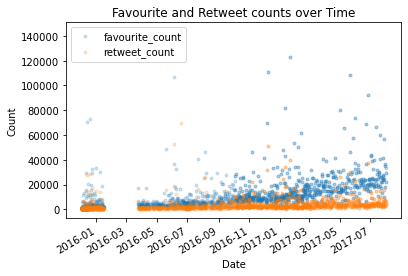

In [111]:
twitter_data[['favourite_count', 'retweet_count']].plot(style = '.', alpha = 0.2)
plt.title('Favourite and Retweet counts over Time')
plt.xlabel('Date')
plt.ylabel('Count')

There seems to be a gradual increase in the two counts over time especially the favourite counts. The variability in favourite counts also increases with time. The year 2017 displays the maximum variability. There are many outlier tweets as well with very high retweet or favourite counts.

Text(0.5, 1.0, 'Most Common Dog Breeds')

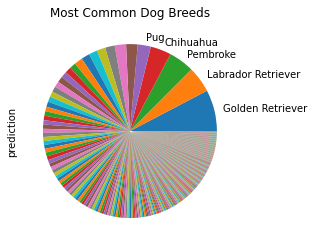

In [110]:
#creating an empty array named labels with the same length as the number of values in the prediction column
labels = np.full(len(twitter_data.prediction.value_counts()), '', dtype = object)
labels[0] = 'Golden Retriever'
labels[1] = 'Labrador Retriever'
labels[2] = 'Pembroke'
labels[3] = 'Chihuahua'
labels[4] = 'Pug'
twitter_data.prediction.value_counts().plot(kind = 'pie', labels = labels)
plt.title('Most Common Dog Breeds')

The most common predictions are visualized through a pie-chart here with the 5 most common labelled. The 5 combined account for almost 25% of the total number of tweets.

All these analyses can be deemed to be accurate only because the data was first gathered, assessed for quality, tidiness issues and appropriately cleaned, thereby also removing unwanted, invalid tweets.